# Training the model using the data we collected

![alt text](https://raw.githubusercontent.com/rajeevratan84/DeepLearningCV/master/amer_sign2.png "Amer Sign")




In [ ]:
# Load our libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [ ]:
# Get our Training and Test Data
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [ ]:
# Inspect our Training data
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,157.0,158.0,152.0,136.0,142.0,159.0,157.0,159.0,149.0,...,190.0,192.0,201.0,199.0,205.0,208.0,212.0,213.0,214.0,213.0
1,0,154.0,157.0,153.0,133.0,139.0,160.0,157.0,158.0,147.0,...,189.0,193.0,200.0,197.0,205.0,206.0,212.0,213.0,213.0,212.0
2,0,155.0,155.0,152.0,133.0,139.0,158.0,155.0,158.0,146.0,...,190.0,195.0,202.0,201.0,204.0,208.0,212.0,213.0,212.0,212.0
3,0,155.0,154.0,151.0,134.0,140.0,157.0,154.0,158.0,146.0,...,188.0,195.0,200.0,199.0,205.0,206.0,212.0,213.0,213.0,212.0
4,0,153.0,154.0,149.0,133.0,139.0,156.0,155.0,156.0,144.0,...,188.0,191.0,199.0,197.0,203.0,204.0,210.0,210.0,210.0,210.0


In [ ]:
# Get our training labels
labels = train['label'].values

In [ ]:
# View the unique labels, 24 in total (no 9)
unique_val = np.array(labels)
np.unique(unique_val)

array([0, 1, 2, 3, 4], dtype=int64)

<AxesSubplot:ylabel='count'>

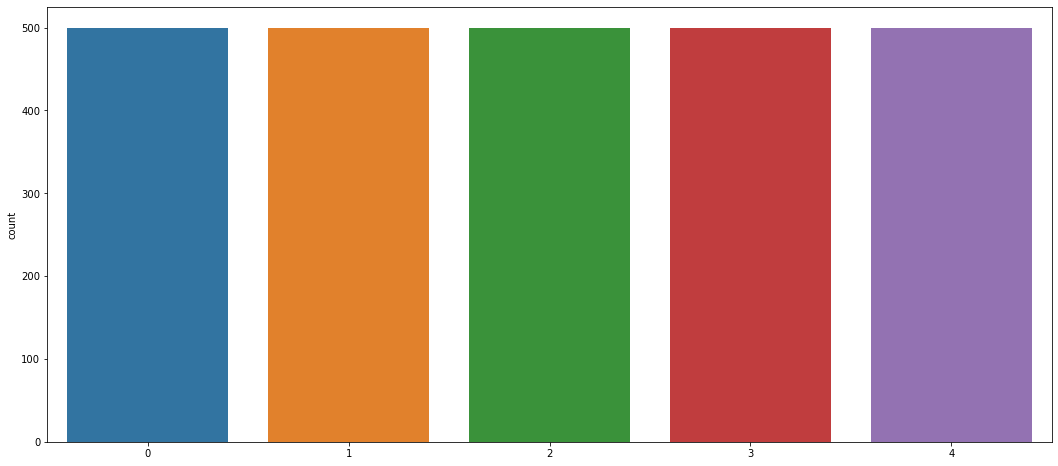

In [ ]:
# Plot the quantities in each class
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

In [ ]:
# Drop Training Labels from our training data so we can separate it 
train.drop('label', axis = 1, inplace = True)

In [ ]:
# Extract the image data from each row in our csv, remember it's in a row of 784 columns
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [ ]:
# hot one encode our labels
from sklearn.preprocessing import LabelBinarizer

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [ ]:
# View our labels
labels
# len(labels[0])

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

[1 0 0 0 0]


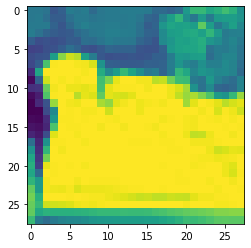

In [ ]:
# Inspect an image
index = 2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [ ]:
# Use OpenCV to view 10 random images from our training data
import cv2
import numpy as np

for i in range(0,10):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]

    sample = input_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("sample image", sample)
    cv2.waitKey(0) 
    
cv2.destroyAllWindows()

In [ ]:
# Split our data into x_train, x_test, y_train and y_test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [ ]:
# Start loading our tensorFlow modules and define our batch size etc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 5
epochs = 10

In [ ]:
# Scale our images
x_train = x_train / 255
x_test = x_test / 255

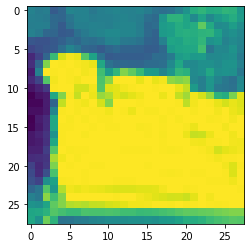

In [ ]:
# Reshape them into the size required by TF and Keras
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

plt.imshow(x_train[0].reshape(28,28))

In [ ]:
# Create our CNN Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam 

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(5, activation = 'softmax'))

In [ ]:
# Compile our Model
model.compile(loss = 'categorical_crossentropy',
              optimizer= Adam(),
              metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)               

In [ ]:
# Train our Model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
14/14 [==============================] - 8s 186ms/step - loss: 1.6024 - accuracy: 0.2423 - val_loss: 1.5845 - val_accuracy: 0.3160
Epoch 2/10
14/14 [==============================] - 2s 125ms/step - loss: 1.5545 - accuracy: 0.3606 - val_loss: 1.4938 - val_accuracy: 0.4560
Epoch 3/10
14/14 [==============================] - 2s 126ms/step - loss: 1.4123 - accuracy: 0.4977 - val_loss: 1.3483 - val_accuracy: 0.5120
Epoch 4/10
14/14 [==============================] - 2s 126ms/step - loss: 1.2330 - accuracy: 0.5480 - val_loss: 1.1201 - val_accuracy: 0.6080
Epoch 5/10
14/14 [==============================] - 2s 126ms/step - loss: 1.0451 - accuracy: 0.6246 - val_loss: 0.9314 - val_accuracy: 0.6600
Epoch 6/10
14/14 [==============================] - 2s 127ms/step - loss: 0.9177 - accuracy: 0.6406 - val_loss: 0.8514 - val_accuracy: 0.6560
Epoch 7/10
14/14 [==============================] - 2s 124ms/step - loss: 0.8333 - accuracy: 0.6657 - val_loss: 0.7572 - val_accuracy: 0.6867
Epoch 

In [ ]:
# Save our Model
model.save("model.h5")
print("Model Saved")

Model Saved


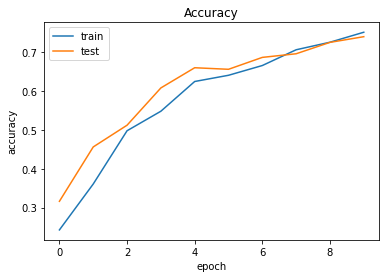

In [ ]:
# View our training history graphically
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [ ]:
# Reshape our test data so that we can evaluate it's performance on unseen data
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binrizer.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape

y_pred = model.predict(test_images)

In [ ]:
# Get our accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred.round())

0.505